<a href="https://colab.research.google.com/github/sosarodrigox/grupo16_ProcesamientoDeDatos/blob/mled/Copia_de_Grupo_16_ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final Procesamiento de Datos - Grupo 16.

Integrantes:

    * Sosa, Rodrigo - sosarodrigox@gmail.com
    *
    * mariano ledezma
    *

 **Descripción del proyecto: El proyecto consiste en desarrollar un procesamiento de datos que incluya las siguientes etapas:**

**1) Recolección y preparación de datos: Obtener o recolectar conjuntos de datos relevantes para el tema elegido. Realizar las tareas de limpieza, integración y transformación necesarias para preparar los datos para el análisis.**

En nuestro caso utilizamos el siguiente dataset: https://www.kaggle.com/c/titanic/data

Utilizamos este dataset dado que luego de investigar es uno de los mas utilizados para comenzar a utilizar las herramientas prácticas en un análisis de datos. El mismo ya se puede comenzar a trabajar por lo que comenzamos con su carga.





RECOLECCIÓN

In [ ]:
#Primero importamos las herramientas que vamos a utilizar para el análisis exploratorio:
import numpy as np
import pandas as pd # Procesamiento de datos, carga y manipulación del CSV
import seaborn as sns
import matplotlib.pyplot as plt #Gráficos

#Importamos los datasets ubicados en /Datasets utilizando pandas:

#Importar datos a colab:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Procesamiento de Datos/PROYECTO ISPC/grupo16_ProcesamientoDeDatos/Datasets/train.csv')

Importar dataset local:
#data = pd.read_csv('../Datasets/train.csv')


#Utilizamos head para ver los primeros 10 filas del conjunto de datos y evaluar como está constituido:
data.head(10)

FileNotFoundError: ignored

In [ ]:
# Vemos la cantidad de datos que tenemos (veremos 891 filas y 12 columnas)
data.shape

(891, 12)

In [ ]:
# Verificamos los tipos de datos del dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Del resultado podemos observar:

_Tenemos un total de 891 datos (filas) y 12 columnas

_Tenemos datos de tipo string(objetos), enteros(int) y decimales(flotantes)

_Tambien podemos ver que hay faltante de datos para las columnas age, cabin y embarked

In [ ]:
# Verificamos los datos faltantes
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

El atributo age tiene aproximadamente un 20% de datos faltantes, para nuestro caso, consideramos conservarla, si la eliminamos podemos estar perdiendo muchos datos importantes. El atributo cabin(sectores del barco) corresponde a un 77% apriximadamente de pérdida, en nuestro caso la vamos a eliminar, pero en un análisis más profundo se puede correlacionar con otros datos y y hacer un análisis especifico de la situación. El atributo embarked tiene sólo 2 datos faltantes, por lo que sería un error eliminarlos

LIMPIEZA

Consideraciones:


1_ Columnas irrelevantes

2_ Cambio nombres de atributos.

3_ Registos repetidos

4_ Valores extremos

5_ Datos faltantes

In [ ]:
# 1_ Columnas irrelevantes
# Eliminaremos la columna cabin ya que faltan muchos datos y no es muy relevante para este análisis
data = data.drop('Cabin', axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
# Verificamos eliminación de la columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
# 2_ Datos Faltantes

#COMPLETAR

# Cambio nombres de atributos.
data.rename(columns={'PassengerId': 'Id_Pasajeros', 'Survived': 'Sobrevivió?', 'Pclass': 'Clase', 'Name': 'Nombre', 'Sex': 'Género', 'Age': 'Edad', 'SibSp': 'Hermanos', 'Parch':'Hijos/Padres', 'Fare': 'Tarifa', 'Embarked': 'PuertoEmbarque'},  inplace=True)
data

,Id_Pasajeros,Sobrevivió?,Clase,Nombre,Género,Edad,Hermanos,Hijos/Padres,Ticket,Tarifa,Cabin,PuertoEmbarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 3_ Registros repetido
# Verificamos si hay filas repetidas

duplicados = data.duplicated()

if duplicados.any():
    print("Existen filas duplicadas en el dataset.")
else:
    print("No hay filas duplicadas en el dataset.")

# En el caso que si ubieran utilizariamos: data.drop_duplicates(inplace=True)

No hay filas duplicadas en el dataset.


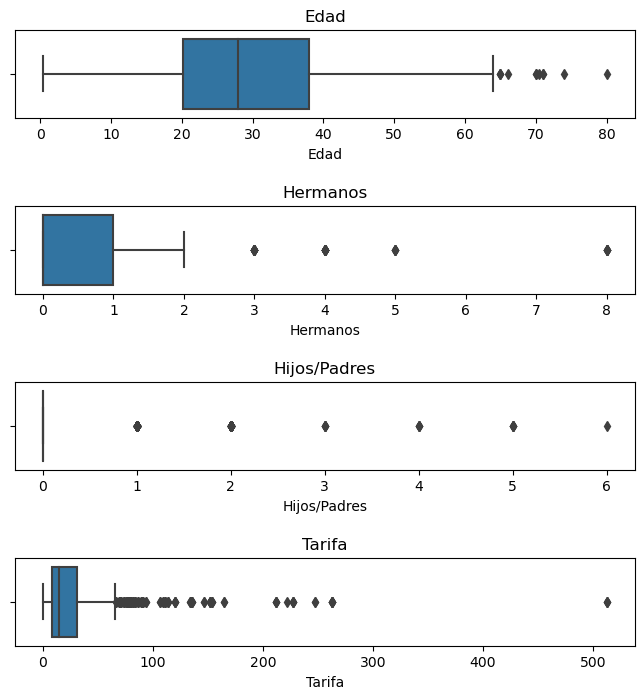

In [ ]:
# 4_ Valores extremos
# Tomamos las columnas con varibles numéricas que queremos analizar
cols_num = ['Edad', 'Hermanos', 'Hijos/Padres', 'Tarifa']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,8))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)


El análisis de valores extremos nos permite ver si hay datos que no correspondan, por ejemplo una edad negativa, o valores que no esten en un cierto rango y no sean válidos. De los graficos concluimos que el mayor número de personas está comprendida entre los 20 y 37 años, con pocas persona en el rango entre 65 y 80 años. La mayoría tiene 0 o 1 hermanos, y posiblemente en el rango de 1 a 10 personas tenga 8 hermanos. La mayoria de las persona viajó sin hijos o padres. Y las tarifas se concentran en un rango entre 3 y 40. Podemos observar un valor extremo, el de 500, que difiere mucho de los anteriores pero está la posibilidad de que le hayan cobrado más.

In [ ]:
# 5_ Datos faltantes
# Los vamos a reemplazar con el promedio de las edades
# Calculamos los promedios
promedio_edad = data['Edad'].mean()
promedio_edad

29.69911764705882

In [ ]:
# Remplazamos los datos faltantes por el promedio de las edades
data['Edad'].fillna(promedio_edad, inplace=True)

In [ ]:
# Comprobamos que los datos faltantes fueros reemplazados
data.isnull().sum()

Id_Pasajeros        0
Sobrevivió?         0
Clase               0
Nombre              0
Género              0
Edad                0
Hermanos            0
Hijos/Padres        0
Ticket              0
Tarifa              0
Cabin             687
PuertoEmbarque      2
dtype: int64

In [ ]:
# Determinamos la moda de la columna Puerto Embarque

moda_embarque = data['PuertoEmbarque'].mode()
moda_embarque


0    S
Name: PuertoEmbarque, dtype: object

In [ ]:
# Remplazamos los datos faltantes por el promedio de las edades
data['PuertoEmbarque'].fillna('S', inplace=True)

In [ ]:
# Comprobamos que los datos faltantes fueros reemplazados
data.isna().sum()

Id_Pasajeros        0
Sobrevivió?         0
Clase               0
Nombre              0
Género              0
Edad                0
Hermanos            0
Hijos/Padres        0
Ticket              0
Tarifa              0
Cabin             687
PuertoEmbarque      0
dtype: int64

Hemos limpiado y transformado el Dataset para que quede listo para el análisis

**2) Análisis exploratorio de datos: Aplicar técnicas de análisis exploratorio para comprender y explorar los datos en profundidad. Esto puede incluir la identificación de patrones, relaciones, valores atípicos y distribuciones de variables.**

1_ Obtenemos los cálculos estadístico del dataset

2_ Análisis univariado

3_ Análisis bivariados
    

In [ ]:
#1_ Obtenemos los cálculos estadístico del dataset
#Vemos los datos estadísticos que forman parte del conjunto de datos con describe()
data.describe()

,Id_Pasajeros,Sobrevivió?,Clase,Edad,Hermanos,Hijos/Padres,Tarifa
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podemos apreciar que la cuenta de pasajeros es de 891 y que el promedio de supervivencia es de 38%. El rango de edad de los pasajeros va desde los meses de edad hasta los 80 años, siendo la edad promedio 30 años. Es un ejercicio interesante tratar de averiguar la tasa de supervivencia en base a características como la edad, la clase que pagó (1era, 2da o 3ra clase) o el género.

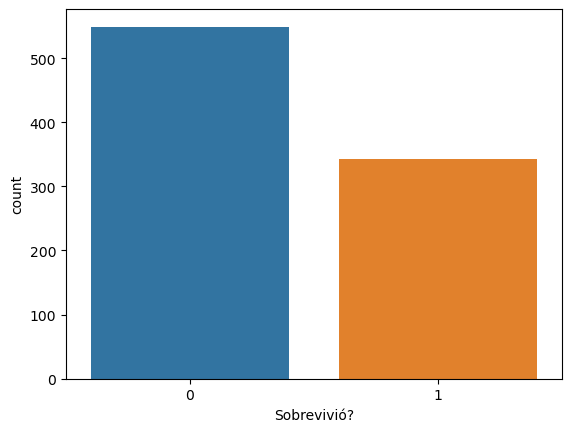

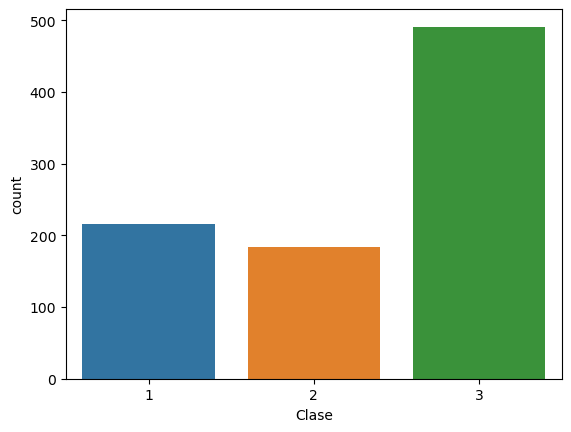

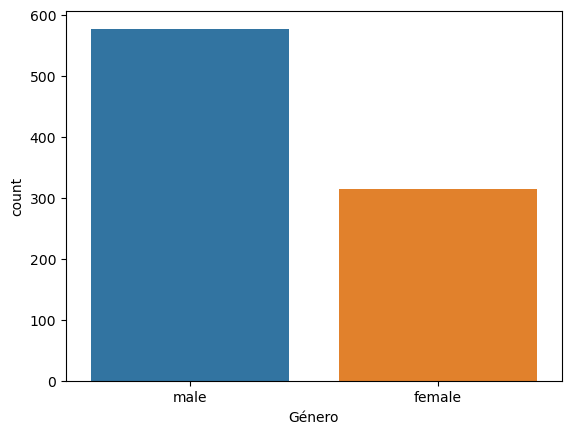

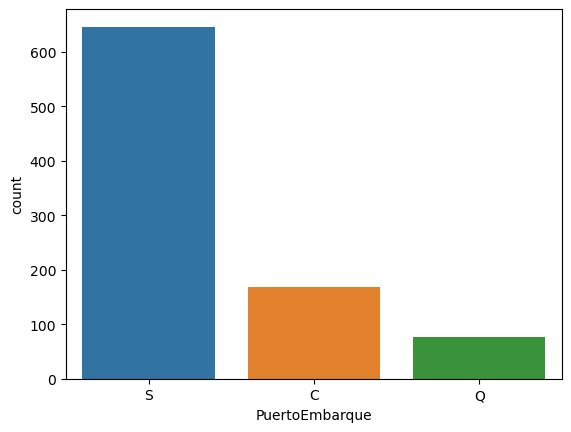

In [ ]:
#2_ Análisis univariado: Variables categóricas

sns.countplot(x='Sobrevivió?', data=data)
plt.show()
sns.countplot(x='Clase', data=data)
plt.show()
sns.countplot(x='Género', data=data)
plt.show()
sns.countplot(x='PuertoEmbarque', data=data)
plt.show()


<Axes: xlabel='Edad', ylabel='count'>

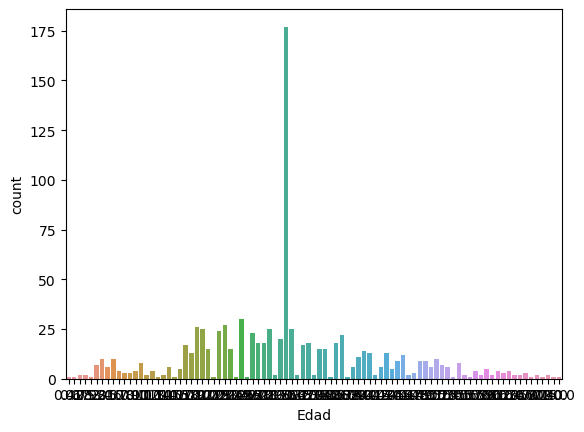

In [ ]:
# Análisis univariado: Variables numéricas
sns.countplot(data=data, x='Edad')

In [ ]:
#3_ Análisis bivariados:
# sns.countplot(x='Edad', data=data)
# plt.show()

3) Procesamiento y análisis de datos: Aplicar técnicas de procesamiento de datos para realizar tareas como filtrado, agregación, transformación y cálculo de métricas relevantes para el tema elegido. Utilizar herramientas de software y lenguajes de programación adecuados para llevar a cabo estas tareas.

In [ ]:
#Filtrado de datos:
#Vamos a filtrar los datos para ver cuantos sobrevivientes menores de edad hubo en el hundimiento del titanic,
# muestro las columnas de edad y género:
filtered_data = data[data['Edad'] < 18]
print(filtered_data[['Edad', 'Género']])

     Edad  Género
7     2.0    male
9    14.0  female
10    4.0  female
14   14.0  female
16    2.0    male
..    ...     ...
850   4.0    male
852   9.0  female
853  16.0  female
869   4.0    male
875  15.0  female

[113 rows x 2 columns]


In [ ]:
#Agregación de datos 1:
# Calcular la media de una columna agrupada por otra columna
grouped_data_1 = filtered_data.groupby('Género')['Edad'].mean()
print(grouped_data_1)


Género
female    9.236364
male      8.856379
Name: Edad, dtype: float64


In [ ]:
#Agregación de datos 2:
# Calcular la suma y el conteo de una columna agrupada por otra columna
grouped_data_2 = filtered_data.groupby('Género')['Edad'].agg(['count'])
print(grouped_data_2)

        count
Género       
female     55
male       58


Del análisis se desprende que la media de edad de supervivencia de los 113 niños se encuentra en torno a los 9 años, y que en cuestiones de género fue mas equitativo que en el promedio general donde los varones tuvieron una media de supervivencia menor.

4) Visualización de datos: Utilizar técnicas y herramientas de visualización de datos para representar gráficamente la información obtenida. Se deben explorar diferentes técnicas de visualización, como gráficos de barras, gráficos de dispersión, diagramas de caja, mapas, entre otros. Además, aplicar técnicas de visualización de múltiples variables para identificar relaciones y patrones complejos en los datos.

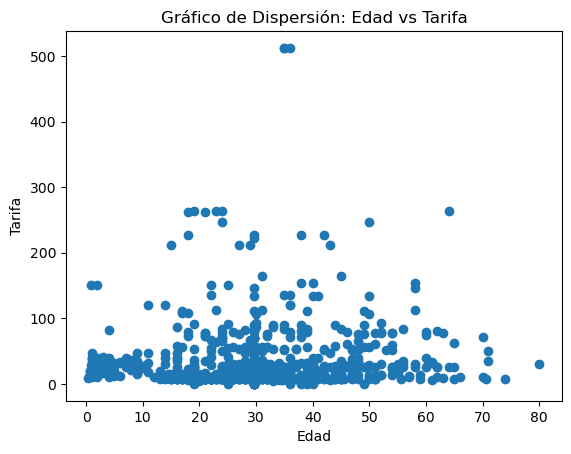

In [ ]:
#Gráfico de dispersión:
# Crear un gráfico de dispersión utilizando las columnas "Edad" y "Tarifa" del DataFrame "data"
plt.scatter(data['Edad'], data['Tarifa'])

# Agregar etiquetas y título al gráfico
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Gráfico de Dispersión: Edad vs Tarifa')

# Mostrar el gráfico
plt.show()

5) Comunicación efectiva de resultados: Generar reportes que presenten de manera clara y concisa los resultados obtenidos durante el procesamiento y análisis de datos.

In [1]:
h=data[data.Name.str.contains('Mr.')].shape[0]
mc=data[data.Name.str.contains('Mrs.')].shape[0]
ms=data[data.Name.str.contains('Miss.')].shape[0]
msd=data[data.Name.str.contains('Ms.')].shape[0]
valores = [h,mc,ms,msd]
personas = ["hombres","Mujeres casadas","Mujeres solteras","Mujeres sin estado civil"]
plt.pie(valores, labels=personas)
plt.axis("equal")
plt.show()

NameError: ignored